<a href="https://colab.research.google.com/github/digitalopentech/mvphealthpucrio/blob/main/machine_learning_sa%C3%BAde_mental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Preditores de doenças de saúde mental** <br>
### 1. Qual é a descrição do problema?

O problema está relacionado à **saúde mental** e busca identificar padrões e fatores que possam influenciar se uma pessoa busca tratamento para problemas de saúde mental. A ideia principal é usar machine learning para prever, com base em características demográficas e profissionais, se uma pessoa pode procurar tratamento para saúde mental.

Este problema é importante porque problemas de saúde mental muitas vezes passam despercebidos e não tratados. Prever quem pode buscar ajuda com base em características específicas pode ajudar a direcionar campanhas de conscientização ou ajustar políticas de saúde ocupacional.

---

### 2. Você tem premissas ou hipóteses sobre o problema? Quais?

**Premissas e Hipóteses:**
1. **Fatores demográficos influenciam:** A idade e o gênero podem desempenhar um papel significativo na decisão de buscar tratamento.
2. **Condições de trabalho são relevantes:** A cultura de uma empresa em relação à saúde mental e o suporte disponível no local de trabalho podem influenciar diretamente as ações dos funcionários.
3. **Histórico familiar tem impacto:** Pessoas com histórico familiar de problemas de saúde mental podem estar mais propensas a buscar tratamento.
4. **Opções de cuidado disponíveis ajudam na decisão:** Disponibilidade de opções de tratamento acessíveis e informações claras sobre saúde mental podem aumentar a probabilidade de procurar ajuda.

---

### 3. Que restrições ou condições foram impostas para selecionar os dados?

**Restrições e Condições:**
1. **Disponibilidade pública:** Apenas datasets de domínio público foram considerados, como os fornecidos pelo Kaggle.
2. **Dados relevantes para o problema:** Os dados devem conter informações demográficas, ocupacionais e relacionadas à saúde mental para serem úteis.
3. **Qualidade dos dados:** Foram selecionados datasets com documentação clara e atributos compreensíveis para reduzir a necessidade de limpeza excessiva.
4. **Volume de dados:** O dataset precisava ter um número suficiente de registros para permitir a criação de modelos confiáveis, evitando viés ou overfitting.
5. **Formatos compatíveis:** Dados em formatos tabulares (CSV) foram priorizados, pois são mais fáceis de integrar em pipelines de machine learning.

---

### 4. Descreva o seu dataset (atributos, imagens, anotações, etc).

**Descrição do Dataset:**
O dataset utilizado contém informações coletadas por meio de uma pesquisa com trabalhadores sobre saúde mental. Abaixo estão os principais atributos:

1. **Demográficos:**
   - **Idade (`Age`):** Idade dos respondentes.
   - **Gênero (`Gender`):** Identidade de gênero informada.

2. **Condições de trabalho:**
   - **Empresa anônima (`Company`):** Nome ou identificação da empresa (se disponível).
   - **Benefícios (`Benefits`):** Se a empresa oferece benefícios relacionados à saúde mental.
   - **Opções de cuidado (`Care Options`):** Opções disponíveis para suporte à saúde mental.
   - **Cultura de saúde mental (`Wellness Program`):** Percepção da cultura da empresa em relação ao bem-estar mental.

3. **Histórico pessoal e familiar:**
   - **Histórico familiar (`Family History`):** Indica se há histórico familiar de problemas de saúde mental.
   - **Histórico de tratamento (`Treatment`):** Se o respondente já procurou tratamento para saúde mental.

4. **Outros atributos:**
   - **Interferência no trabalho (`Work Interfere`):** Grau de interferência da saúde mental no trabalho.
   - **Abertura para discutir saúde mental (`Mental Health Discussion`):** Se o respondente se sente confortável para discutir saúde mental no trabalho.

**Anotações:**
O dataset contém respostas em formato categórico e numérico, que podem exigir pré-processamento, como codificação de rótulos e normalização, para serem utilizadas em modelos de machine learning.

**Observações:**
- Os dados podem conter valores ausentes ou inconsistências (por exemplo, respostas mal formatadas ou idades fora de um intervalo realista).
- A classe alvo é `Treatment`, que indica se o indivíduo buscou ou não tratamento para saúde mental.

<a id='Library_and_data_loading'></a>
## **1. Biblioteca e carregamento de dados** ##

In [ ]:
import numpy as np # álgebra linear
import pandas as pd # processamento de dados, leitura de arquivos CSV (exemplo: pd.read_csv)
import matplotlib.pyplot as plt # biblioteca para visualização de dados
import seaborn as sns # biblioteca para visualização de dados avançada

from scipy import stats # biblioteca para estatísticas
from scipy.stats import randint # geração de números inteiros aleatórios

# Preparação de dados
from sklearn.model_selection import train_test_split # dividir dados em treino e teste
from sklearn import preprocessing # pré-processamento de dados
from sklearn.datasets import make_classification # criação de datasets sintéticos para classificação
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler # ferramentas para transformação de dados

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression # regressão logística
from sklearn.tree import DecisionTreeClassifier # árvore de decisão
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier # modelos de ensemble (florestas aleatórias e árvores extras)

# Bibliotecas para validação de modelos
from sklearn import metrics # métricas de avaliação
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve # cálculo de acurácia e outras métricas
from sklearn.model_selection import cross_val_score # validação cruzada

# Redes Neurais
from sklearn.neural_network import MLPClassifier # Perceptron multicamada (MLP)
from sklearn.model_selection import RandomizedSearchCV # busca aleatória para otimização de hiperparâmetros

# Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier # modelos de ensemble com bagging e boosting
from sklearn.neighbors import KNeighborsClassifier # algoritmo k-vizinhos mais próximos (KNN)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB # classificador Bayesiano ingênuo

# Stacking
from mlxtend.classifier import StackingClassifier # método de ensemble para combinação de classificadores

# Os arquivos de entrada de dados estão disponíveis no diretório "../input/".
# Por exemplo, executar este código (clicando em "executar" ou pressionando Shift+Enter) listará os arquivos no diretório de entrada.

from subprocess import check_output
print(check_output(["ls", "../content"]).decode("utf8"))

# Todos os resultados gerados serão salvos no diretório atual.

# Lendo os arquivos CSV a partir de um caminho de arquivo
train_df = pd.read_csv('https://raw.githubusercontent.com/digitalopentech/mvphealthpucrio/refs/heads/main/survey.csv')

# Pandas: quantas linhas e colunas existem no dataset?
print(train_df.shape)

# Pandas: qual é a distribuição dos dados no dataset?
print(train_df.describe())

# Pandas: quais tipos de dados existem no dataset?
print(train_df.info())


results.csv
sample_data
submission.csv
survey.csv

(1259, 27)
                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null 

<a id='Data_cleaning'></a>
## **2. Limpeza de dados** ##

In [ ]:
#dados faltantes
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


                           Total   Percent
comments                    1095  0.869738
state                        515  0.409055
work_interfere               264  0.209690
self_employed                 18  0.014297
seek_help                      0  0.000000
obs_consequence                0  0.000000
mental_vs_physical             0  0.000000
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
supervisor                     0  0.000000
coworkers                      0  0.000000
phys_health_consequence        0  0.000000
mental_health_consequence      0  0.000000
leave                          0  0.000000
anonymity                      0  0.000000
Timestamp                      0  0.000000
wellness_program               0  0.000000
Age                            0  0.000000
benefits                       0  0.000000
tech_company                   0  0.000000
remote_work                    0  0.000000
no_employees                   0  0.000000
treatment  

In [ ]:
#lidando com dados faltantes
#Vamos nos livrar das variáveis ​​“Timestamp”, “comentários”, “estado”
train_df = train_df.drop(['comments'], axis= 1)
train_df = train_df.drop(['state'], axis= 1)
train_df = train_df.drop(['Timestamp'], axis= 1)

train_df.isnull().sum().max()
train_df.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


**Limpando valores NaN**

In [ ]:
# Atribuir valores padrão para cada tipo de dado
defaultInt = 0 # Valor padrão para inteiros
defaultString = 'NaN' # Valor padrão para strings
defaultFloat = 0.0 # Valor padrão para floats

# Criar listas por tipo de dado
intFeatures = ['Age'] # Recursos do tipo inteiro
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help'] # Recursos do tipo string
floatFeatures = [] # Recursos do tipo float (nenhum listado aqui)

# Limpar os valores NaN
for feature in train_df:  # Percorrer cada coluna no dataset
    if feature in intFeatures:  # Verificar se a coluna está na lista de inteiros
        train_df[feature] = train_df[feature].fillna(defaultInt)  # Preencher valores NaN com o padrão inteiro
    elif feature in stringFeatures:  # Verificar se a coluna está na lista de strings
        train_df[feature] = train_df[feature].fillna(defaultString)  # Preencher valores NaN com o padrão string
    elif feature in floatFeatures:  # Verificar se a coluna está na lista de floats
        train_df[feature] = train_df[feature].fillna(defaultFloat)  # Preencher valores NaN com o padrão float
    else:  # Caso o recurso não seja reconhecido
        print('Erro: Recurso %s não reconhecido.' % feature)  # Imprimir mensagem de erro

train_df.head(5)  # Mostrar as 5 primeiras linhas do dataset


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
# Verificar se ainda existem valores ausentes no dataset
missing_values = train_df.isnull().sum()

# Exibir as colunas que ainda possuem valores ausentes, se houver
if missing_values.sum() > 0:
    print("Colunas com valores ausentes após o preenchimento:")
    print(missing_values[missing_values > 0])
else:
    print("Todos os valores ausentes foram tratados. Não há mais valores NaN no dataset.")

# Exibir um resumo das primeiras linhas para garantir que os dados estão limpos
train_df.head(5)


Todos os valores ausentes foram tratados. Não há mais valores NaN no dataset.


,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [ ]:
# Limpeza da coluna 'Gender'
# Converter todos os elementos da coluna para letras minúsculas
gender = train_df['Gender'].str.lower()
#print(gender)

# Selecionar elementos únicos da coluna
gender = train_df['Gender'].unique()

# Criar grupos de gênero para padronização
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man", "msle", "mail", "malr", "cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary", "nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]
female_str = ["cis female", "f", "female", "woman", "femake", "female ", "cis-female/femme", "female (cis)", "femail"]

# Substituir valores baseados nos grupos criados
for (row, col) in train_df.iterrows():
    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

# Remover entradas inválidas
stk_list = ['A little about you', 'p']  # Valores irrelevantes na coluna 'Gender'
train_df = train_df[~train_df['Gender'].isin(stk_list)]

# Exibir os valores únicos de gênero após a limpeza
print(train_df['Gender'].unique())


['female' 'male' 'trans']


In [ ]:
# # Preencha com valores media() < 18 e > 120
s = pd.Series(train_df['Age'])
s[s<0] = train_df['Age'].median()
train_df['Age'] = s
s = pd.Series(train_df['Age'])
s[s>100] = train_df['Age'].median()
train_df['Age'] = s

train_df['age_range'] = pd.cut(train_df['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)



Verificando valores fora do intervalo após o tratamento:
Menores que 0: 0
Maiores que 100: 0

Distribuição das faixas etárias:
age_range
31-65     675
21-30     557
0-20       24
66-100      1
Name: count, dtype: int64


<ipython-input-156-13f59af5801e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_range', data=train_df, palette='viridis')


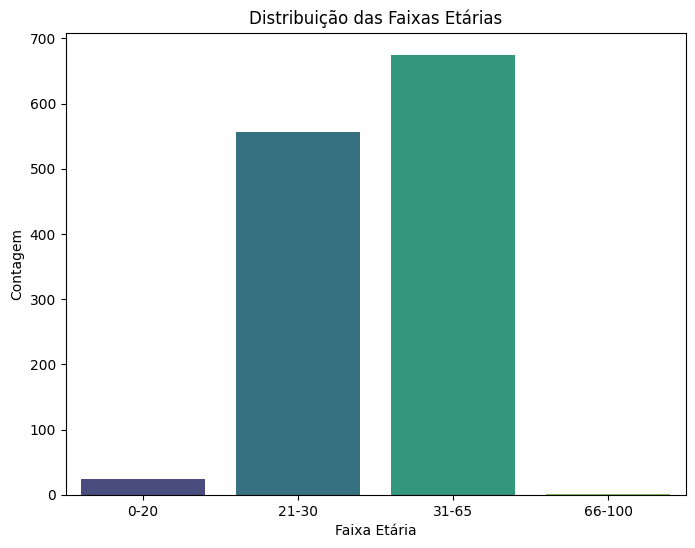

In [ ]:
# Verificar se há valores fora dos intervalos após o tratamento
print("Verificando valores fora do intervalo após o tratamento:")
print(f"Menores que 0: {(train_df['Age'] < 0).sum()}")
print(f"Maiores que 100: {(train_df['Age'] > 100).sum()}")

# Exibir a contagem de cada faixa etária criada
print("\nDistribuição das faixas etárias:")
print(train_df['age_range'].value_counts())

# Visualizar a distribuição das faixas etárias
plt.figure(figsize=(8, 6))
sns.countplot(x='age_range', data=train_df, palette='viridis')
plt.title('Distribuição das Faixas Etárias')
plt.xlabel('Faixa Etária')
plt.ylabel('Contagem')
plt.show()


In [ ]:
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [ ]:
#Existem apenas 0,014% de trabalhadores autônomos, então vamos mudar NaN para NÃO trabalhadores autônomos
#Substitua a string "NaN" de defaultString
train_df['work_interfere'] = train_df['work_interfere'].replace([defaultString], 'Don\'t know' )
print(train_df['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


<a id='Encoding_data'></a>
## **3. Encoding data**

In [ ]:
# Codificação dos dados
labelDict = {}  # Dicionário para armazenar os mapeamentos de rótulos
for feature in train_df:  # Percorrer cada coluna no dataset
    le = preprocessing.LabelEncoder()  # Inicializar o codificador de rótulos
    le.fit(train_df[feature])  # Ajustar o codificador aos valores da coluna
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))  # Criar mapeamento de rótulos
    train_df[feature] = le.transform(train_df[feature])  # Transformar os valores em rótulos codificados
    # Obter os rótulos codificados
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]  # Lista de valores mapeados
    labelDict[labelKey] = labelValue  # Adicionar ao dicionário

# Imprimir os mapeamentos de rótulos para cada coluna
for key, value in labelDict.items():
    print(key, value)

# Remover a coluna 'Country', pois não será usada
train_df = train_df.drop(['Country'], axis=1)
train_df.head()  # Exibir as primeiras linhas do dataset transformado


label_Age [5, 11, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['female', 'male', 'trans']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment ['No', 'Yes']
label_work_interfere ["Don't know", 'Never', 'Often', 'Rarely', 'Sometimes']
label

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,21,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,28,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,16,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,15,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,15,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


### Testando se não há dados faltantes

In [ ]:
#dados faltantes
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total  Percent
Age                            0      0.0
Gender                         0      0.0
obs_consequence                0      0.0
mental_vs_physical             0      0.0
phys_health_interview          0      0.0
mental_health_interview        0      0.0
supervisor                     0      0.0
coworkers                      0      0.0
phys_health_consequence        0      0.0
mental_health_consequence      0      0.0
leave                          0      0.0
anonymity                      0      0.0
seek_help                      0      0.0
wellness_program               0      0.0
care_options                   0      0.0
benefits                       0      0.0
tech_company                   0      0.0
remote_work                    0      0.0
no_employees                   0      0.0
work_interfere                 0      0.0
treatment                      0      0.0
family_history                 0      0.0
self_employed                  0  

Dimensionamento de Funcionalidades Vamos dimensionar a idade, pois é extremamente diferente das demais.

<a id='Covariance_Matrix'></a>
## **4. Matriz de Covariância. Comparação de variabilidade entre categorias de variáveis**

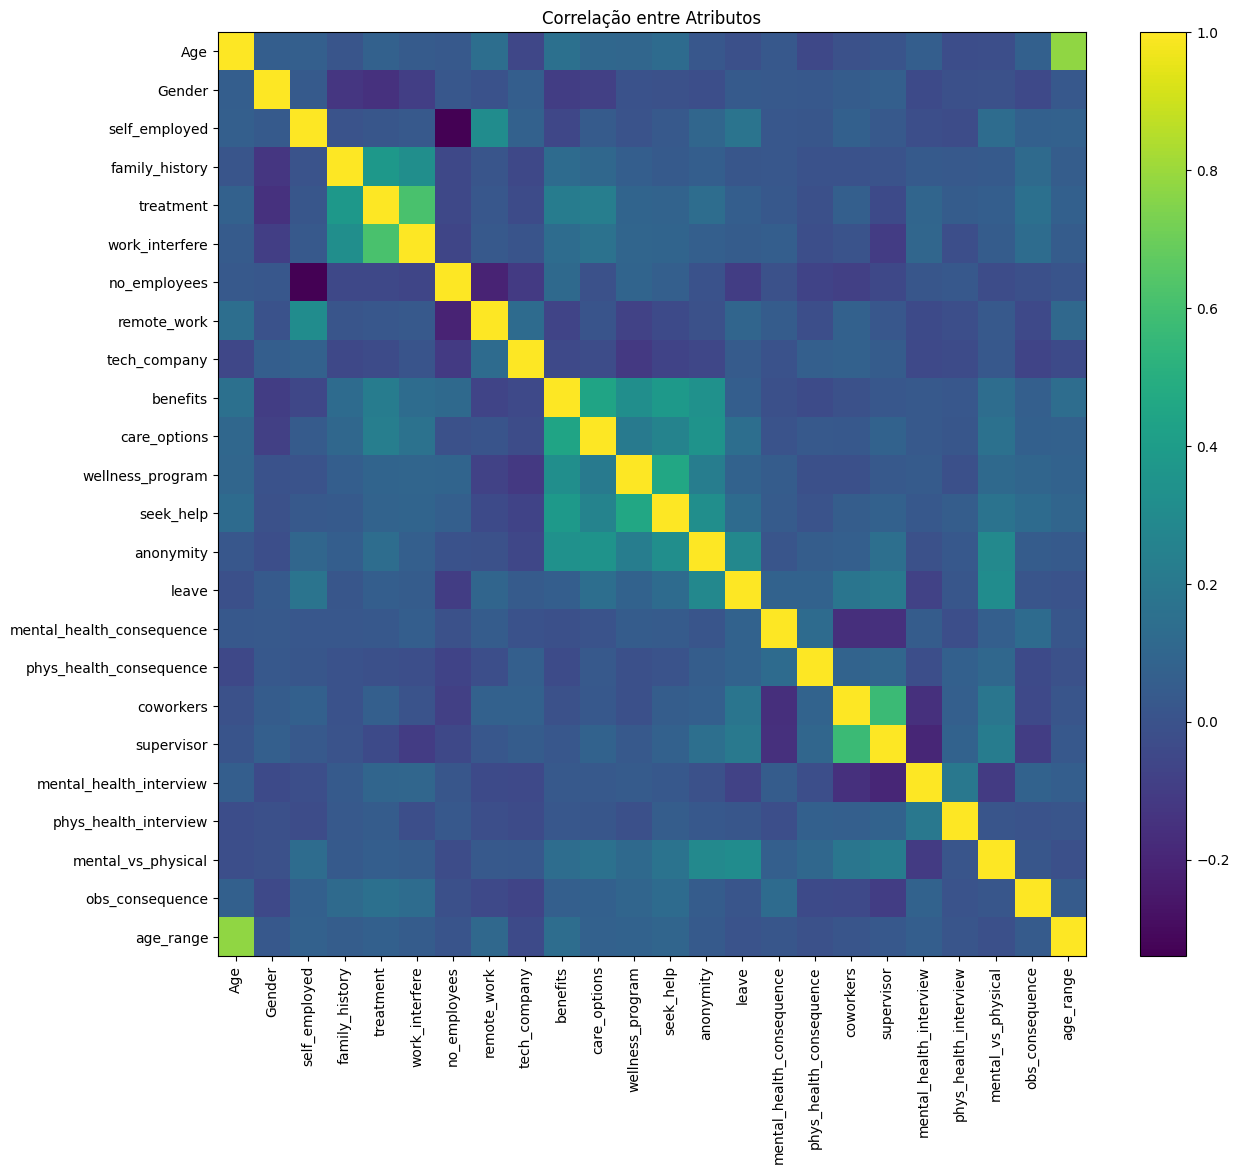

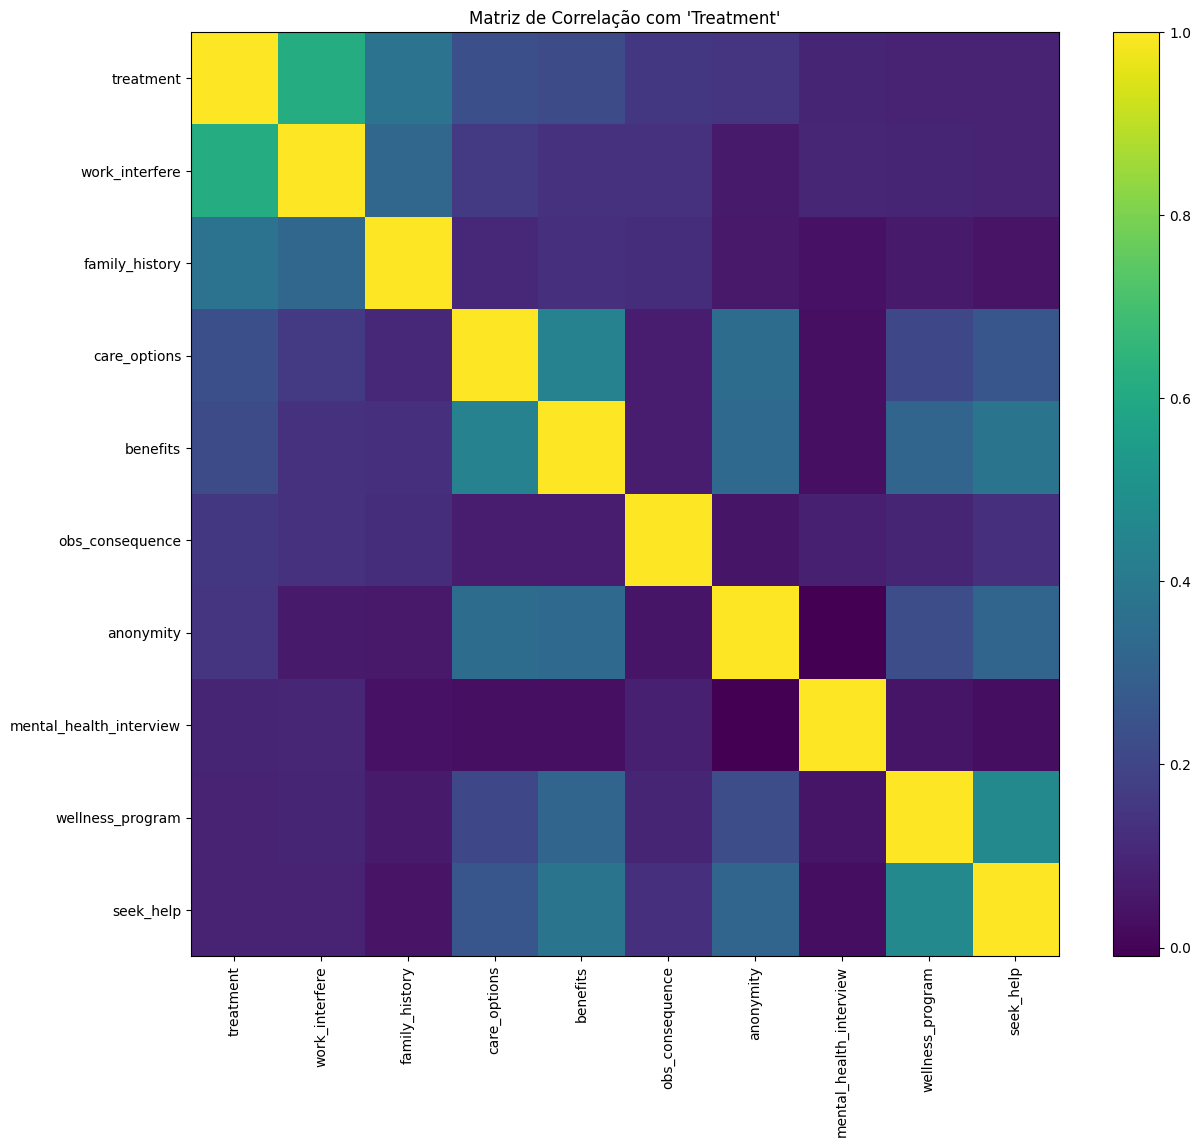

In [ ]:
# Matriz de correlação geral
corrmat = train_df.corr()  # Calcula a matriz de correlação
plt.figure(figsize=(14, 12))  # Define o tamanho da figura
plt.imshow(corrmat, cmap="viridis", aspect="auto")  # Exibe a matriz como uma imagem
plt.title("Correlação entre Atributos")  # Título do gráfico
plt.xticks(range(len(corrmat.columns)), corrmat.columns, rotation=90)  # Configura os rótulos do eixo x
plt.yticks(range(len(corrmat.columns)), corrmat.columns)  # Configura os rótulos do eixo y
plt.colorbar()  # Adiciona uma barra de cores
plt.show()  # Mostra o gráfico

# Matriz de correlação focada no atributo 'treatment'
k = 10  # Número de variáveis a serem exibidas no heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index  # Seleciona as variáveis mais correlacionadas com 'treatment'
cm = np.corrcoef(train_df[cols].values.T)  # Calcula a matriz de correlação das variáveis selecionadas

plt.figure(figsize=(14, 12))  # Define o tamanho da figura
plt.imshow(cm, cmap="viridis", aspect="auto")  # Exibe a matriz como uma imagem
plt.title("Matriz de Correlação com 'Treatment'")  # Título do gráfico
plt.xticks(range(len(cols)), cols, rotation=90)  # Configura os rótulos do eixo x
plt.yticks(range(len(cols)), cols)  # Configura os rótulos do eixo y
plt.colorbar()  # Adiciona uma barra de cores
plt.show()  # Mostra o gráfico


<a id='Some_charts_to_see_data_relationship'></a>
## **5. Alguns gráficos para ver o relacionamento dos dados**

Distribuição e densidade por idade

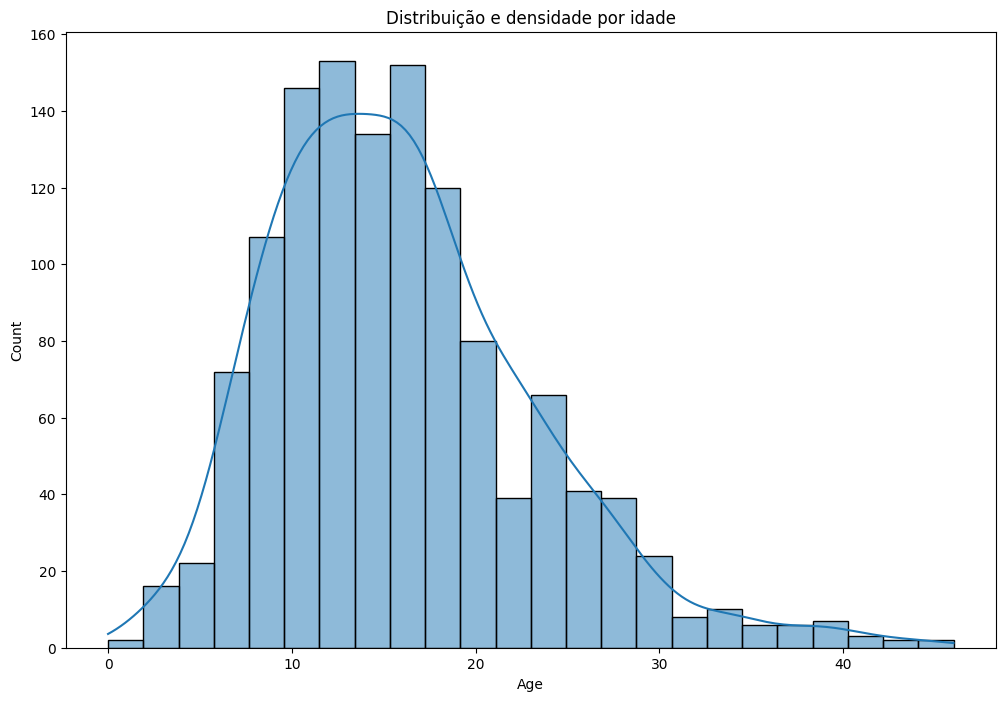

In [ ]:
# Distribuição e densidade por idade
plt.figure(figsize=(12, 8))
sns.histplot(train_df["Age"], bins=24, kde=True)  # Substitui distplot
plt.title("Distribuição e densidade por idade")
plt.xlabel("Age")
plt.show()


Separate by treatment

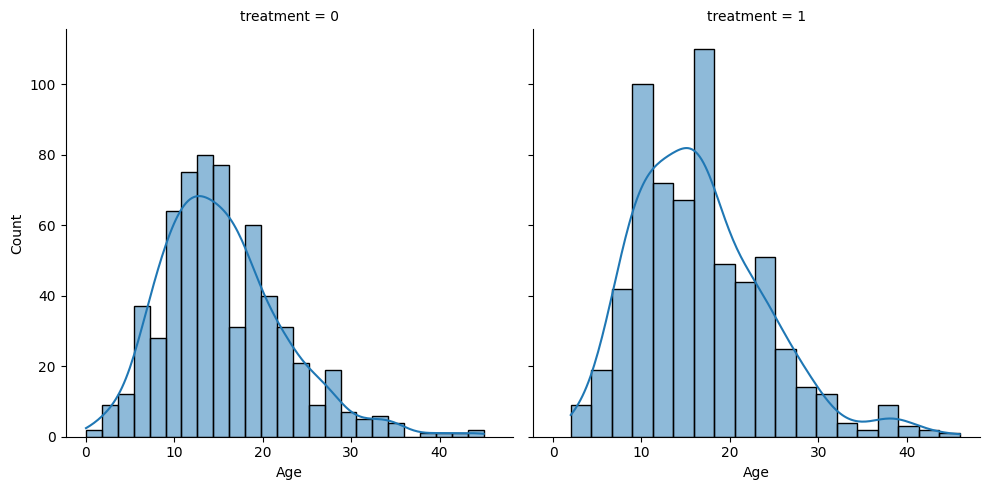

In [ ]:
# Separate by treatment or not

g = sns.FacetGrid(train_df, col='treatment', height=5)
g = g.map(sns.histplot, "Age", kde=True)


How many people has been treated?

<ipython-input-168-91e04a9c7ab1>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(labels)  # Define os rótulos do eixo x com base nos mapeamentos


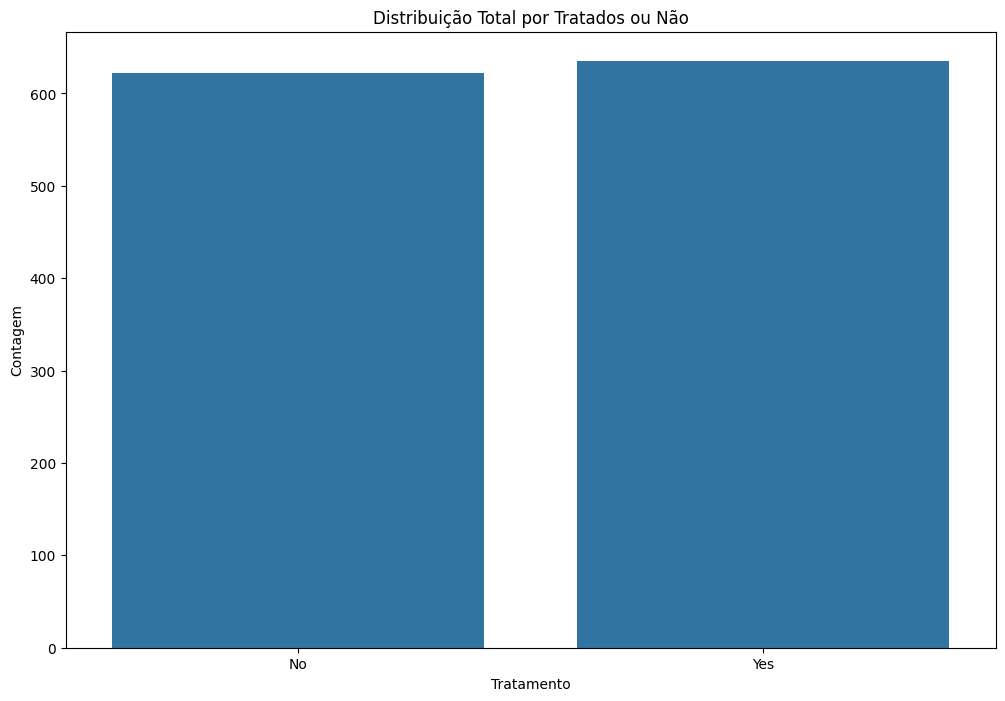

In [ ]:
# Vamos visualizar quantas pessoas buscaram tratamento
plt.figure(figsize=(12, 8))  # Define o tamanho da figura
labels = labelDict['label_treatment']  # Obtém os rótulos codificados para 'treatment'
g = sns.countplot(x="treatment", data=train_df)  # Cria um gráfico de contagem para 'treatment'
g.set_xticklabels(labels)  # Define os rótulos do eixo x com base nos mapeamentos

# Título do gráfico
plt.title('Distribuição Total por Tratados ou Não')  # Título do gráfico
plt.xlabel('Tratamento')  # Rótulo do eixo x
plt.ylabel('Contagem')  # Rótulo do eixo y

plt.show()  # Exibe o gráfico


Draw a nested barplot to show probabilities for class and sex

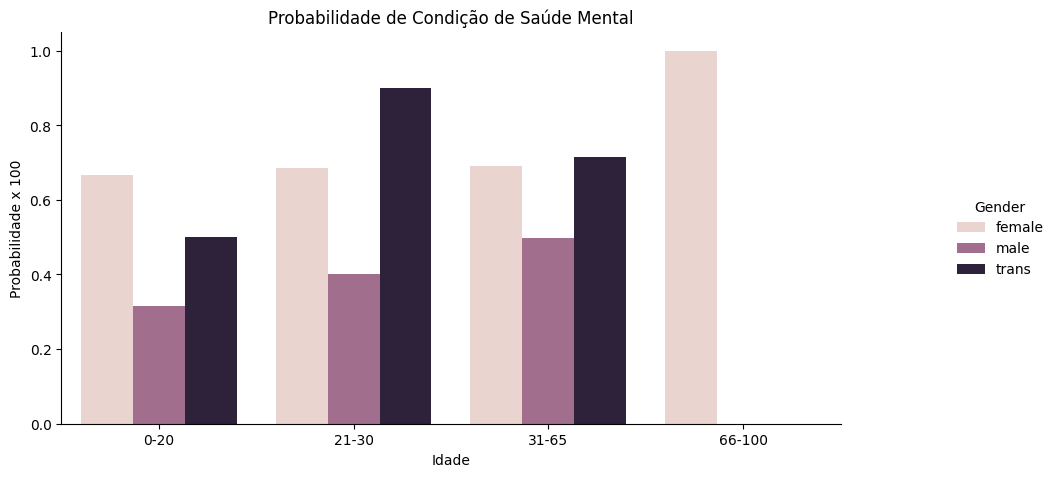

In [ ]:
o = labelDict['label_age_range']  # Obtém os rótulos das faixas etárias

# Criação do gráfico de barras categórico
g = sns.catplot(
    x="age_range",  # Faixas etárias no eixo x
    y="treatment",  # Probabilidade de tratamento no eixo y
    hue="Gender",  # Diferenciação por gênero
    data=train_df,  # Dataset utilizado
    kind="bar",  # Tipo do gráfico: barras
    errorbar=None,  # Remove barras de erro
    height=5,  # Altura do gráfico
    aspect=2,  # Proporção do gráfico
    legend_out=True  # Posiciona a legenda fora do gráfico
)

# Define os rótulos das faixas etárias
g.set_xticklabels(o)

# Adiciona título e rótulos aos eixos
plt.title('Probabilidade de Condição de Saúde Mental')  # Título do gráfico
plt.ylabel('Probabilidade x 100')  # Rótulo do eixo y
plt.xlabel('Idade')  # Rótulo do eixo x

# Substituir os rótulos da legenda
new_labels = labelDict['label_Gender']  # Obtém os rótulos para gêneros
for t, l in zip(g.legend.texts, new_labels):  # Itera pelos textos da legenda e substitui
    t.set_text(l)

# Posiciona a legenda e ajusta o gráfico
g.fig.subplots_adjust(top=0.9, right=0.8)

# Exibe o gráfico
plt.show()


Barplot para mostrar probabilidades de histórico familiar

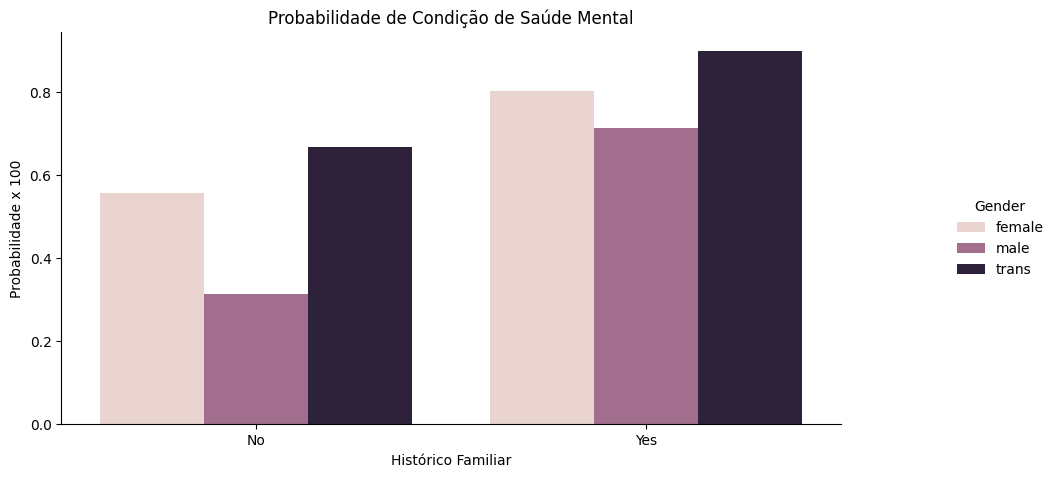

In [ ]:
o = labelDict['label_family_history']  # Obtém os rótulos para o histórico familiar

# Criação do gráfico de barras categórico
g = sns.catplot(
    x="family_history",  # Histórico familiar no eixo x
    y="treatment",  # Probabilidade de tratamento no eixo y
    hue="Gender",  # Diferenciação por gênero
    data=train_df,  # Dataset utilizado
    kind="bar",  # Tipo do gráfico: barras
    errorbar=None,  # Remove barras de erro
    height=5,  # Altura do gráfico
    aspect=2,  # Proporção do gráfico
    legend_out=True  # Posiciona a legenda fora do gráfico
)

# Define os rótulos para o eixo x
g.set_xticklabels(o)

# Adiciona título e rótulos aos eixos
plt.title('Probabilidade de Condição de Saúde Mental')  # Título do gráfico
plt.ylabel('Probabilidade x 100')  # Rótulo do eixo y
plt.xlabel('Histórico Familiar')  # Rótulo do eixo x

# Substituir os rótulos da legenda
new_labels = labelDict['label_Gender']  # Obtém os rótulos para gêneros
for t, l in zip(g.legend.texts, new_labels):  # Atualiza os textos da legenda
    t.set_text(l)

# Ajusta a posição da legenda
g.fig.subplots_adjust(top=0.9, right=0.8)

# Exibe o gráfico
plt.show()


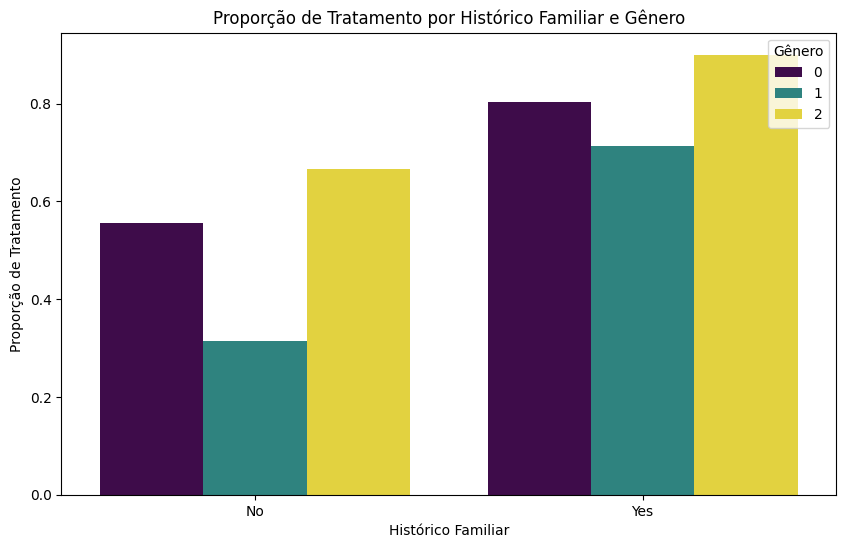

In [ ]:
# Calcular a proporção de tratamento para cada categoria de 'family_history' por gênero
treatment_proportions = train_df.groupby(['family_history', 'Gender'])['treatment'].mean().reset_index()

# Criar o gráfico de barras para proporção de tratamento
plt.figure(figsize=(10, 6))
sns.barplot(
    x='family_history',
    y='treatment',
    hue='Gender',
    data=treatment_proportions,
    palette='viridis'
)

# Adicionar rótulos e título
plt.title('Proporção de Tratamento por Histórico Familiar e Gênero')
plt.xlabel('Histórico Familiar')
plt.ylabel('Proporção de Tratamento')
plt.xticks(ticks=range(len(o)), labels=o, rotation=0)  # Ajustar rótulos no eixo x
plt.legend(title='Gênero', loc='upper right')  # Legenda com título

# Exibir o gráfico
plt.show()


Barplot para mostrar probabilidades de opções de cuidados

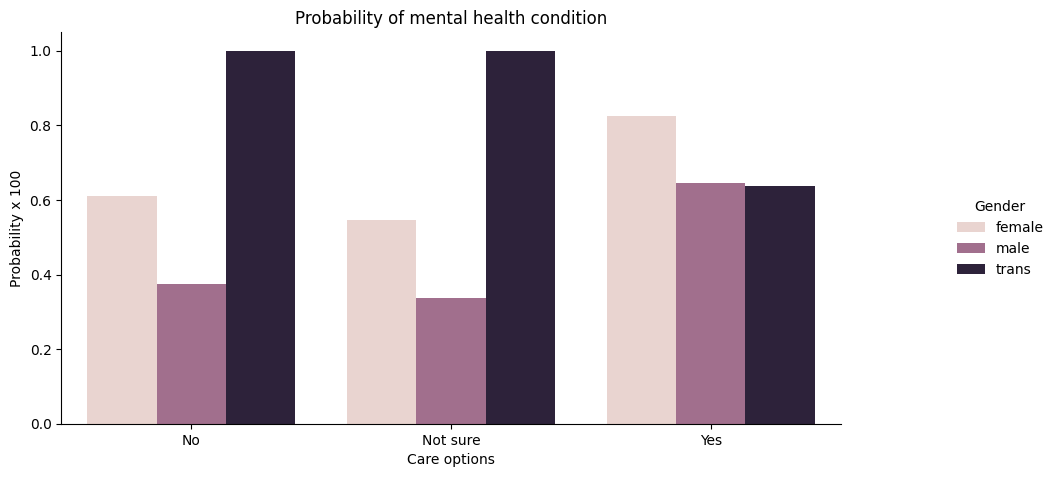

In [ ]:
o = labelDict['label_care_options']

# Substituindo factorplot por catplot
g = sns.catplot(
    x="care_options",
    y="treatment",
    hue="Gender",
    data=train_df,
    kind="bar",
    errorbar=None,  # Substitui ci=None
    height=5,       # Substitui size
    aspect=2,
    legend_out=True
)

g.set_xticklabels(o)
plt.title('Probability of mental health condition')
plt.ylabel('Probability x 100')
plt.xlabel('Care options')

# Replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g.legend.texts, new_labels):
    t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9, right=0.8)
plt.show()


Gráfico de barras para mostrar probabilidades de benefícios

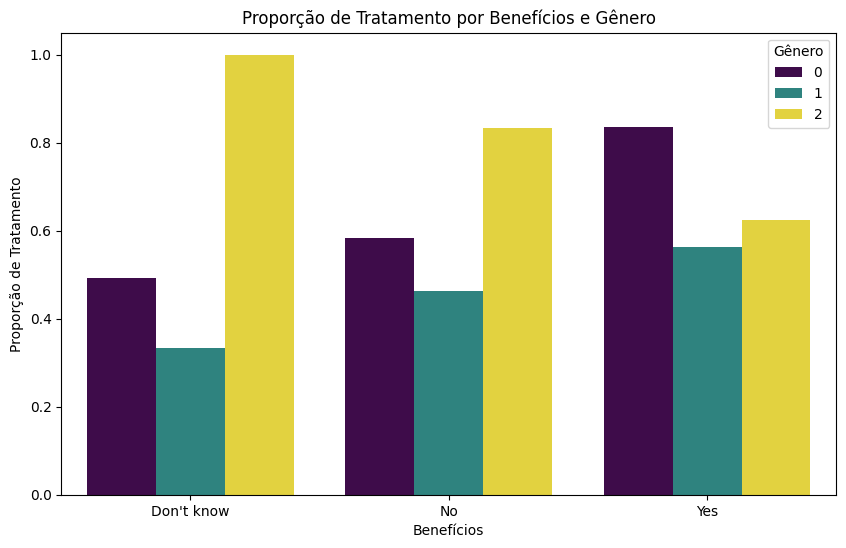

In [ ]:
# Calcular proporção de tratamento com base em 'benefits' e 'Gender'
treatment_proportions_benefits = train_df.groupby(['benefits', 'Gender'])['treatment'].mean().reset_index()

# Criar gráfico de barras para proporção de tratamento
plt.figure(figsize=(10, 6))
sns.barplot(
    x='benefits',
    y='treatment',
    hue='Gender',
    data=treatment_proportions_benefits,
    palette='viridis'
)

# Configurar títulos e rótulos
plt.title('Proporção de Tratamento por Benefícios e Gênero')
plt.xlabel('Benefícios')
plt.ylabel('Proporção de Tratamento')
plt.xticks(ticks=range(len(o)), labels=o, rotation=0)  # Ajustar rótulos no eixo x
plt.legend(title='Gênero', loc='upper right')  # Legenda com título

# Exibir o gráfico
plt.show()


Gráfico de barras para mostrar probabilidades de interferência no trabalho

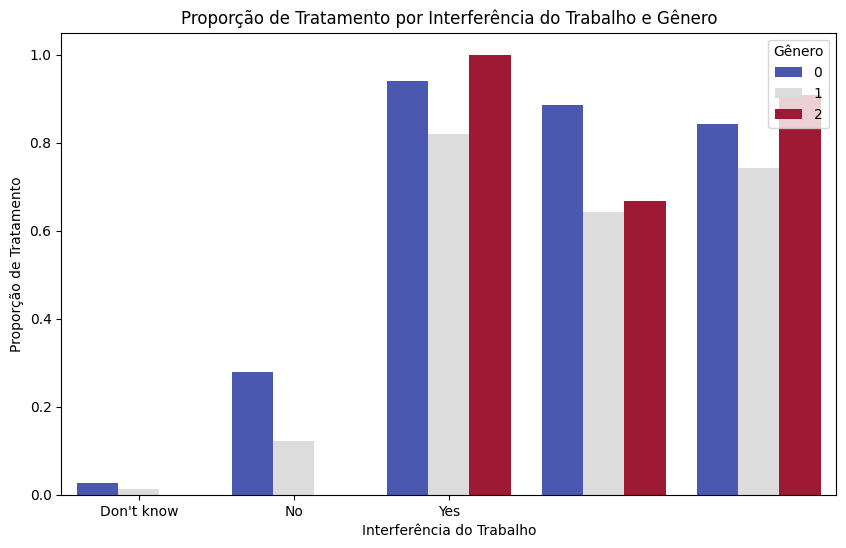

In [ ]:
# Calcular proporção de tratamento com base em 'work_interfere' e 'Gender'
treatment_proportions_work = train_df.groupby(['work_interfere', 'Gender'])['treatment'].mean().reset_index()

# Criar gráfico de barras para proporção de tratamento
plt.figure(figsize=(10, 6))
sns.barplot(
    x='work_interfere',
    y='treatment',
    hue='Gender',
    data=treatment_proportions_work,
    palette='coolwarm'
)

# Configurar títulos e rótulos
plt.title('Proporção de Tratamento por Interferência do Trabalho e Gênero')
plt.xlabel('Interferência do Trabalho')
plt.ylabel('Proporção de Tratamento')
plt.xticks(ticks=range(len(o)), labels=o, rotation=0)  # Ajustar rótulos no eixo x
plt.legend(title='Gênero', loc='upper right')  # Configurar legenda com título

# Exibir o gráfico
plt.show()


<a id='Scaling_and_fitting'></a>
## **6. Scaling and fitting** ##



Dimensionamento de Funcionalidades Vamos dimensionar a idade, pois é extremamente diferente das demais.

In [ ]:
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()


,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_range
0,0.456522,0,0,0,1,2,4,0,1,2,...,2,1,1,1,2,1,0,2,0,2
1,0.608696,1,0,0,0,3,5,0,0,0,...,0,0,1,0,0,1,1,0,0,2
2,0.347826,1,0,0,0,3,4,0,1,1,...,1,1,1,2,2,2,2,1,0,2
3,0.326087,1,0,1,1,2,2,0,1,1,...,1,2,2,1,0,0,0,1,1,2
4,0.326087,1,0,0,0,1,1,1,1,2,...,0,1,1,1,2,2,2,0,0,2


Dividindo o conjunto de dados

Selected features: Index(['Age', 'Gender', 'family_history', 'work_interfere', 'benefits',
       'care_options'],
      dtype='object')


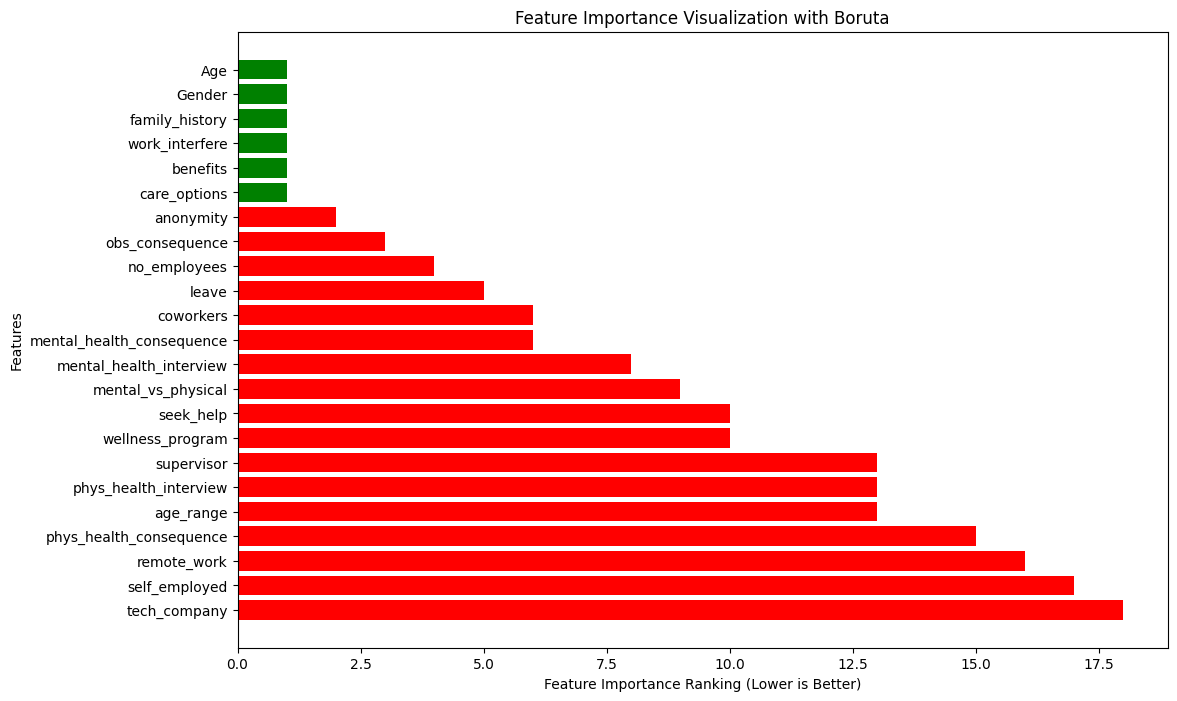

In [ ]:
!pip install boruta
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Definir o conjunto de features e o alvo
X = train_df.drop('treatment', axis=1)
y = train_df['treatment']

# Inicializar o modelo RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state=42)

# Inicializar Boruta
boruta = BorutaPy(rf, n_estimators='auto', random_state=42)

# Executar Boruta no dataset
boruta.fit(X.values, y.values)

# Obter as features selecionadas
selected_features = X.columns[boruta.support_]
print("Selected features:", selected_features)

# Visualização das features selecionadas
import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': boruta.ranking_,
    'Selected': boruta.support_
}).sort_values(by='Ranking', ascending=True)

plt.figure(figsize=(12, 8))
colors = ['green' if selected else 'red' for selected in feature_importance['Selected']]
plt.barh(feature_importance['Feature'], feature_importance['Ranking'], color=colors)
plt.xlabel('Feature Importance Ranking (Lower is Better)')
plt.ylabel('Features')
plt.title('Feature Importance Visualization with Boruta')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Definir X (variáveis preditoras) e y (variável-alvo)
feature_cols = ['Age', 'Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity']  # Seleção das colunas preditoras
X = train_df[feature_cols]  # Conjunto de variáveis preditoras
y = train_df.treatment  # Variável-alvo: tratamento

# Dividir X e y em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=99)  # Divisão em 70% treino e 30% teste

# Criar dicionários para armazenar resultados para o gráfico final
# Uso: methodDict['Stacking'] = accuracy_score
methodDict = {}  # Dicionário para armazenar as métricas de acurácia por método
rmseDict = ()  # Placeholder para RMSE (Root Mean Squared Error)


In [ ]:
# Verificar os tamanhos dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print("\nTamanho do conjunto de teste:")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Visualizar a distribuição de classes no conjunto de treino e teste
print("\nDistribuição da variável-alvo no conjunto de treino:")
print(y_train.value_counts(normalize=True) * 100)

print("\nDistribuição da variável-alvo no conjunto de teste:")
print(y_test.value_counts(normalize=True) * 100)

# Verificar os primeiros registros do conjunto de treino
print("\nPrimeiras linhas do conjunto de treino:")
print(X_train.head())

# Verificar a correlação entre as variáveis preditoras e a variável-alvo no conjunto de treino
correlation_matrix = X_train.join(y_train).corr()
print("\nMatriz de correlação entre as variáveis preditoras e a variável-alvo (conjunto de treino):")
print(correlation_matrix['treatment'].sort_values(ascending=False))


Tamanho do conjunto de treino:
X_train: (879, 7), y_train: (879,)

Tamanho do conjunto de teste:
X_test: (378, 7), y_test: (378,)

Distribuição da variável-alvo no conjunto de treino:
treatment
0    50.739477
1    49.260523
Name: proportion, dtype: float64

Distribuição da variável-alvo no conjunto de teste:
treatment
1    53.439153
0    46.560847
Name: proportion, dtype: float64

Primeiras linhas do conjunto de treino:
          Age  Gender  family_history  work_interfere  benefits  care_options  \
720  0.369565       1               0               0         0             0   
798  0.239130       1               1               0         1             0   
711  0.239130       1               0               0         0             1   
958  0.217391       1               0               3         2             1   
774  0.456522       1               1               3         1             0   

     anonymity  
720          0  
798          0  
711          0  
958          0  
774 

'<a id='Ajuste'></a>
## **7. Afinação**
### **Avaliando um modelo de classificação.** <br>
Esta função avaliará:<br>
* **Precisão da classificação: **porcentagem de previsões corretas
* **Precisão nula:** precisão que pode ser alcançada sempre prevendo a classe mais frequente
* **Porcentagem de unidades**<br>
* **Porcentagem de zero**s<br>
* **Matriz de confusão: **Tabela que descreve o desempenho de um modelo de classificação
        Verdadeiros Positivos (TP): previmos corretamente que eles têm diabetes
        Verdadeiros Negativos (TN): previmos corretamente que eles não têm diabetes
        Falsos Positivos (FP): previmos incorretamente que eles têm diabetes (um "erro Tipo I")
        Prever falsamente positivo
        Falsos Negativos (FN): previmos incorretamente que eles não têm diabetes (um "erro Tipo II")
        Prever falsamente negativo

* **Taxa de falsos positivos**<br>
* **Precisão do valor positivo**<br>
* **AUC:** é a porcentagem do gráfico ROC que está abaixo da curva
        0,90-1 = excelente (A)
        0,80-0,90 = bom (B)
        0,70-0,80 = razoável (C)
        0,60-0,70 = ruim (D)
        0,50-0,60 = falha (F)
E alguns outros valores para processos de ajuste.

In [ ]:
def evalClassModel(model, y_test, y_pred_class, plot=False):
    # Acurácia da classificação: porcentagem de previsões corretas
    # calcular a acurácia
    print('Acurácia:', metrics.accuracy_score(y_test, y_pred_class))

    # Acurácia nula: acurácia que poderia ser alcançada sempre prevendo a classe mais frequente
    # examinar a distribuição das classes no conjunto de teste (usando um método do Pandas Series)
    # print('Acurácia nula:\n', y_test.value_counts())

    # calcular a porcentagem de valores positivos
    print('Porcentagem de positivos:', y_test.mean())

    # calcular a porcentagem de valores negativos
    print('Porcentagem de negativos:', 1 - y_test.mean())

    # Comparação dos valores reais e previstos
    # print('Verdadeiro:', y_test.values[0:25])
    # print('Previsto:', y_pred_class[0:25])

    # Conclusão:
    # A acurácia da classificação é a métrica mais fácil de entender
    # Mas não informa a distribuição subjacente dos valores de resposta
    # E não mostra que "tipos" de erros o classificador está cometendo

    # Matriz de confusão
    # salvar a matriz de confusão e dividir em quatro partes
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    #[linha, coluna]
    TP = confusion[1, 1]  # Verdadeiros positivos
    TN = confusion[0, 0]  # Verdadeiros negativos
    FP = confusion[0, 1]  # Falsos positivos
    FN = confusion[1, 0]  # Falsos negativos

    # Visualizar a matriz de confusão
    sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Matriz de Confusão: Desempenho do Modelo', fontsize=14)
    plt.xlabel('Rótulos Previstos', fontsize=12)
    plt.ylabel('Rótulos Verdadeiros', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

    # Métricas calculadas a partir da matriz de confusão
    # Acurácia da Classificação: Geralmente, com que frequência o classificador está correto?
    accuracy = metrics.accuracy_score(y_test, y_pred_class)
    print('Acurácia da Classificação:', accuracy)

    # Erro de Classificação: Geralmente, com que frequência o classificador está incorreto?
    print('Erro de Classificação:', 1 - metrics.accuracy_score(y_test, y_pred_class))

    # Taxa de Falsos Positivos: Quando o valor real é negativo, com que frequência a previsão está incorreta?
    false_positive_rate = FP / float(TN + FP)
    print('Taxa de Falsos Positivos:', false_positive_rate)

    # Precisão: Quando um valor positivo é previsto, com que frequência a previsão está correta?
    print('Precisão:', metrics.precision_score(y_test, y_pred_class))

    # AUC com validação cruzada
    print('AUC com Validação Cruzada:', cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean())

    ##########################################
    # Ajustando o limiar de classificação
    ##########################################
    # Armazenar as probabilidades previstas para a classe 1
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    if plot:
        # Histograma de probabilidades previstas
        bins = np.linspace(0, 1, 11)
        bin_labels = [f"{round(bins[i], 2)}-{round(bins[i+1], 2)}" for i in range(len(bins)-1)]
        counts, _ = np.histogram(y_pred_prob, bins=bins)

        # Gráfico de barras
        plt.figure(figsize=(10, 6))
        plt.bar(bin_labels, counts, color='blue', alpha=0.7)
        plt.title('Gráfico de Barras das Probabilidades Previstas', fontsize=14)
        plt.xlabel('Intervalos de Probabilidade Prevista', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)
        plt.xticks(rotation=45)
        plt.show()

    # Prever tratamento se a probabilidade prevista for maior que 0.3
    y_pred_prob = y_pred_prob.reshape(-1, 1)
    y_pred_class = binarize(y_pred_prob, 0.3)[0]

    # Gráfico da curva ROC e cálculo da AUC
    roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
    if plot:
        plt.figure(figsize=(8, 6))
        plt.fill_between(fpr, tpr, alpha=0.3, color='lightblue', label='AUC = %0.2f' % roc_auc)
        plt.plot(fpr, tpr, color='blue', linewidth=2, label='Curva ROC')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5, label='Adivinhação Aleatória')
        plt.title('Curva ROC', fontsize=16)
        plt.xlabel('Taxa de Falsos Positivos (FPR)', fontsize=14)
        plt.ylabel('Taxa de Verdadeiros Positivos (TPR)', fontsize=14)
        plt.legend(loc="lower right", fontsize=12)
        plt.grid(alpha=0.3)
        plt.show()

    return accuracy


### **Ajuste com pontuação de validação cruzada**

[0.7629079365079365, 0.7493777777777777, 0.7994539682539682, 0.7915428571428571, 0.809047619047619, 0.7971238095238096, 0.8146666666666667, 0.8082984126984127, 0.8154603174603174, 0.8098920634920634, 0.8162603174603176, 0.8090730158730158, 0.8130539682539683, 0.813847619047619, 0.8170222222222222, 0.8130285714285714, 0.8185904761904762, 0.816215873015873, 0.8185714285714285, 0.8146031746031746, 0.8225714285714286, 0.8201904761904762, 0.8209777777777777, 0.821784126984127, 0.818584126984127, 0.8185904761904762, 0.8170031746031746, 0.8170095238095237, 0.8201841269841269, 0.8170095238095237]


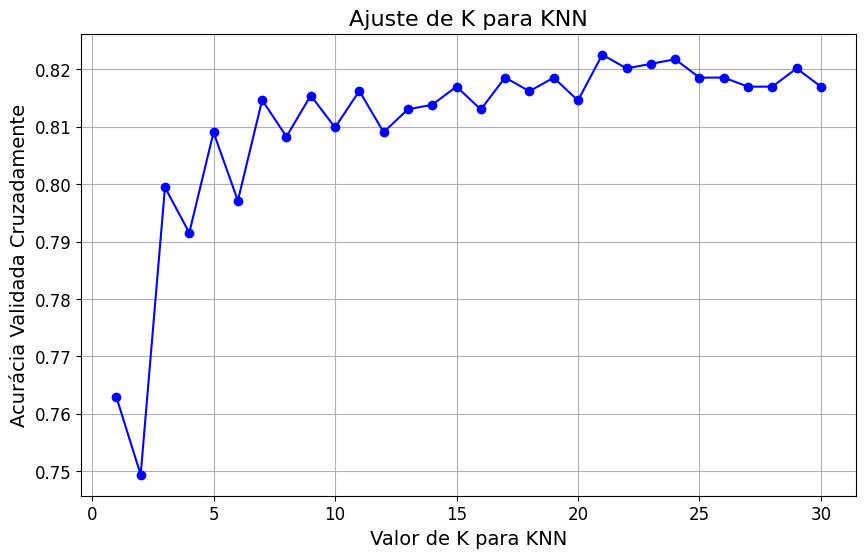

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

def tuningCV(knn):
    # Pesquisar um valor ideal de K para KNN
    k_range = list(range(1, 31))  # Intervalo de valores para K
    k_scores = []  # Lista para armazenar as pontuações de cada valor de K

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)  # Inicializa o modelo KNN com K atual
        scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # Validação cruzada
        k_scores.append(scores.mean())  # Calcula e armazena a média das pontuações de validação cruzada

    print(k_scores)  # Exibe as pontuações para cada valor de K

    # Configurações de exibição do gráfico
    plt.figure(figsize=(10, 6))  # Configura o tamanho do gráfico
    plt.plot(k_range, k_scores, marker='o', linestyle='-', color='blue')  # Plota com marcadores e linhas
    plt.xlabel('Valor de K para KNN', fontsize=14)  # Rótulo do eixo x
    plt.ylabel('Acurácia Validada Cruzadamente', fontsize=14)  # Rótulo do eixo y
    plt.title('Ajuste de K para KNN', fontsize=16)  # Título do gráfico
    plt.grid(True)  # Exibir grade
    plt.xticks(fontsize=12)  # Ajustar tamanho da fonte dos rótulos do eixo x
    plt.yticks(fontsize=12)  # Ajustar tamanho da fonte dos rótulos do eixo y
    plt.show()  # Garantir que o gráfico seja exibido

# Chamando a função para teste
knn = KNeighborsClassifier()  # Modelo base
tuningCV(knn)  # Chamada da função


### **Tuning with GridSearchCV** ###

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
[0.76290794 0.74937778 0.79945397 0.79154286 0.80904762 0.79712381
 0.81466667 0.80829841 0.81546032 0.80989206 0.81626032 0.80907302
 0.81305397 0.81384762 0.81702222 0.81302857 0.81859048 0.81621587
 0.81857143 0.81460317 0.82257143 0.82019048 0.82097778 0.82178413
 0.81858413 0.81859048 0.81700317 0.81700952 0.82018413 0.81700952]


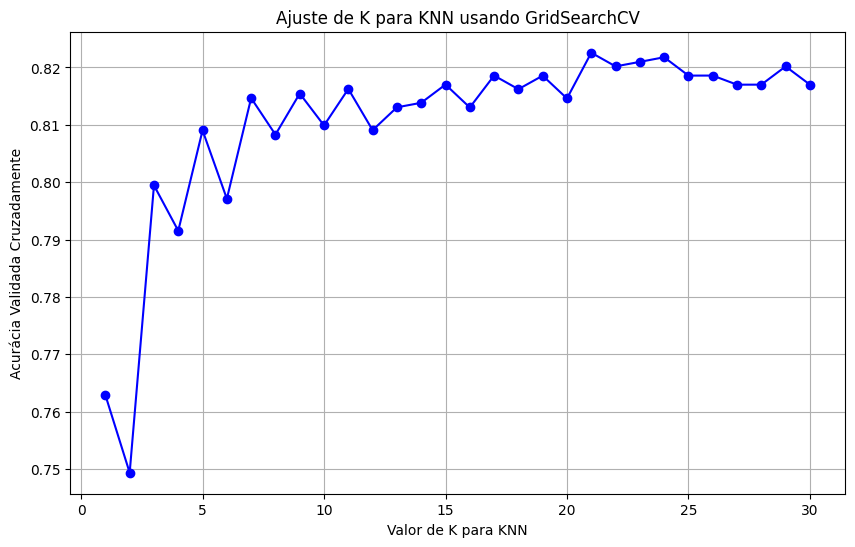

Melhor Pontuação do GridSearch: 0.8225714285714286
Melhores Parâmetros do GridSearch: {'n_neighbors': 21}
Melhor Estimador do GridSearch: KNeighborsClassifier(n_neighbors=21)


In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def tuningGridSearch(knn):
    # Configurando os valores de parâmetro que devem ser pesquisados
    k_range = list(range(1, 31))  # Intervalo de valores para o parâmetro n_neighbors
    print(k_range)

    # Criar uma grade de parâmetros
    param_grid = dict(n_neighbors=k_range)
    print(param_grid)

    # Instanciar o GridSearchCV
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # Validação cruzada com 10 folds

    # Ajustar o GridSearch com os dados
    grid.fit(X, y)

    # Criar uma lista das médias das pontuações de validação
    grid_mean_scores = grid.cv_results_['mean_test_score']  # Substitui grid.grid_scores_
    print(grid_mean_scores)

    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, grid_mean_scores, marker='o', linestyle='-', color='blue')  # Gráfico de linha com marcadores
    plt.xlabel('Valor de K para KNN')  # Rótulo do eixo x
    plt.ylabel('Acurácia Validada Cruzadamente')  # Rótulo do eixo y
    plt.title('Ajuste de K para KNN usando GridSearchCV')  # Título do gráfico
    plt.grid(True)  # Adicionar grade ao gráfico
    plt.show()  # Exibir o gráfico

    # Examinar o melhor modelo
    print('Melhor Pontuação do GridSearch:', grid.best_score_)
    print('Melhores Parâmetros do GridSearch:', grid.best_params_)
    print('Melhor Estimador do GridSearch:', grid.best_estimator_)

# Exemplo de uso:
knn = KNeighborsClassifier()
tuningGridSearch(knn)


### **Tuning com RandomizedSearchCV** ###

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

def tuningRandomizedSearchCV(model, param_dist):
    # Pesquisando múltiplos parâmetros simultaneamente
    # n_iter controla o número de buscas
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)

    # Examine o melhor modelo
    print('Melhor Pontuação do RandomizedSearch:', rand.best_score_)
    print('Melhores Parâmetros do RandomizedSearch:', rand.best_params_)

    # Executar RandomizedSearchCV 20 vezes (com n_iter=10) e registrar a melhor pontuação
    best_scores = []
    for _ in range(20):
        rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
        rand.fit(X, y)
        best_scores.append(round(rand.best_score_, 3))

    print('Melhores Pontuações em 20 execuções:', best_scores)

    # Analisar os resultados do RandomizedSearch
    results = rand.cv_results_
    mean_scores = results['mean_test_score']
    params = results['params']

    # Exibir os parâmetros testados e as pontuações
    for score, param in zip(mean_scores, params):
        print(f"Parâmetros: {param}, Pontuação Média: {score:.4f}")

# Exemplo de uso:
param_dist = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
tuningRandomizedSearchCV(knn, param_dist)


Melhor Pontuação do RandomizedSearch: 0.8201904761904762
Melhores Parâmetros do RandomizedSearch: {'weights': 'uniform', 'n_neighbors': 22}
Melhores Pontuações em 20 execuções: [0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82, 0.82]
Parâmetros: {'weights': 'distance', 'n_neighbors': 16}, Pontuação Média: 0.7876
Parâmetros: {'weights': 'uniform', 'n_neighbors': 22}, Pontuação Média: 0.8202
Parâmetros: {'weights': 'uniform', 'n_neighbors': 18}, Pontuação Média: 0.8162
Parâmetros: {'weights': 'uniform', 'n_neighbors': 27}, Pontuação Média: 0.8170
Parâmetros: {'weights': 'uniform', 'n_neighbors': 29}, Pontuação Média: 0.8202
Parâmetros: {'weights': 'distance', 'n_neighbors': 10}, Pontuação Média: 0.7852
Parâmetros: {'weights': 'distance', 'n_neighbors': 22}, Pontuação Média: 0.7916
Parâmetros: {'weights': 'uniform', 'n_neighbors': 14}, Pontuação Média: 0.8138
Parâmetros: {'weights': 'distance', 'n_neighbors': 12}, Pontuação M

### **Ajuste com busca de vários parâmetros simultaneamente** ###

Parâmetros para pesquisa: {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
Melhor Pontuação: 0.8225714285714286
Melhores Parâmetros: {'n_neighbors': 21, 'weights': 'uniform'}
Parâmetros: {'n_neighbors': 1, 'weights': 'uniform'}, Pontuação Média: 0.7629
Parâmetros: {'n_neighbors': 1, 'weights': 'distance'}, Pontuação Média: 0.7629
Parâmetros: {'n_neighbors': 2, 'weights': 'uniform'}, Pontuação Média: 0.7494
Parâmetros: {'n_neighbors': 2, 'weights': 'distance'}, Pontuação Média: 0.7582
Parâmetros: {'n_neighbors': 3, 'weights': 'uniform'}, Pontuação Média: 0.7995
Parâmetros: {'n_neighbors': 3, 'weights': 'distance'}, Pontuação Média: 0.7741
Parâmetros: {'n_neighbors': 4, 'weights': 'uniform'}, Pontuação Média: 0.7915
Parâmetros: {'n_neighbors': 4, 'weights': 'distance'}, Pontuação Média: 0.7813
Parâmetros: {'n_neighbors': 5, 'weights': 'uniform'}, Pontuação Média: 0.8090
Par

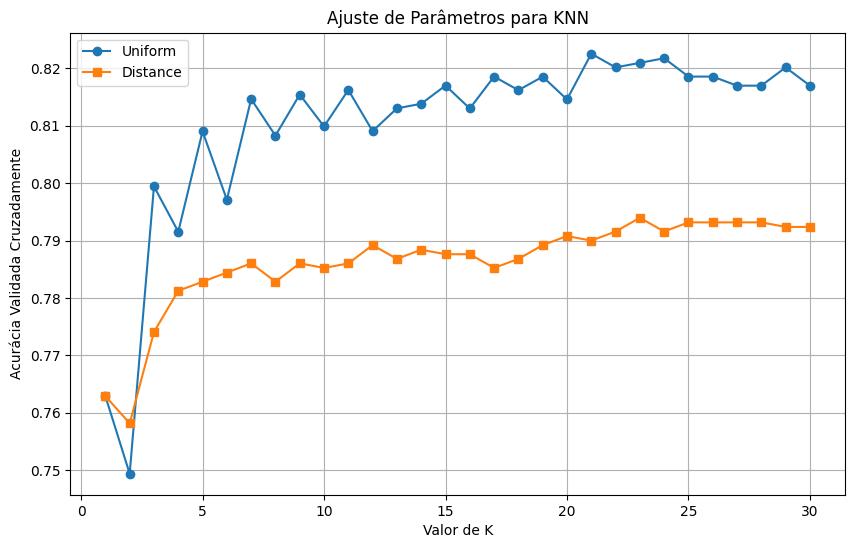

In [ ]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def tuningMultParam(knn):
    # Pesquisar múltiplos parâmetros simultaneamente
    # Definir os valores de parâmetro que devem ser pesquisados
    k_range = list(range(1, 31))  # Intervalo de valores para K
    weight_options = ['uniform', 'distance']  # Opções para os pesos

    # Criar uma grade de parâmetros
    param_grid = dict(n_neighbors=k_range, weights=weight_options)
    print('Parâmetros para pesquisa:', param_grid)

    # Instanciar o GridSearchCV
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')  # Validação cruzada com 10 folds
    grid.fit(X, y)  # Ajustar a grade com os dados

    # Examinar o melhor modelo
    print('Melhor Pontuação:', grid.best_score_)
    print('Melhores Parâmetros:', grid.best_params_)

    # Analisar os resultados do GridSearch
    results = grid.cv_results_
    mean_scores = results['mean_test_score']
    params = results['params']

    # Exibir os parâmetros testados e as pontuações
    for score, param in zip(mean_scores, params):
        print(f"Parâmetros: {param}, Pontuação Média: {score:.4f}")

    # Plotar os resultados para cada valor de K
    scores_uniform = []
    scores_distance = []

    for param, mean_score in zip(params, mean_scores):
        if param['weights'] == 'uniform':
            scores_uniform.append(mean_score)
        else:
            scores_distance.append(mean_score)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, scores_uniform, label='Uniform', marker='o')
    plt.plot(k_range, scores_distance, label='Distance', marker='s')
    plt.xlabel('Valor de K')
    plt.ylabel('Acurácia Validada Cruzadamente')
    plt.title('Ajuste de Parâmetros para KNN')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de uso:
param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
tuningMultParam(knn)


<a id='Evaluating_models'></a>
## **8. Avaliando modelos**<br><br>
<a id='Logistic_regression'></a>
### Logistic Regression

In [ ]:
def evalClassModel(model, y_true, y_pred, verbose=False):
    accuracy = metrics.accuracy_score(y_true, y_pred)
    if verbose:
        print(f"Accuracy: {accuracy:.2f}")
    return accuracy


In [ ]:
# Certifique-se de que os dados sejam preparados antes
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Defina os recursos (X) e o rótulo alvo (y)
feature_cols = ['Age', 'Gender', 'family_history', 'work_interfere', 'benefits', 'care_options', 'anonymity']
X = train_df[feature_cols]
y = train_df['treatment']

# Divida os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Inicialize o dicionário para armazenar os resultados dos métodos
methodDict = {}

# Defina a função para treinar o modelo de regressão logística
def train_logistic_regression_model():
    # Instanciar o modelo de regressão logística
    logreg = LogisticRegression(max_iter=500)  # Certifique-se de aumentar max_iter para evitar warnings

    # Treinar o modelo com os dados de treino
    logreg.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_class = logreg.predict(X_test)

    print('########### Logistic Regression ###############')

    # Avaliar o modelo usando uma métrica
    accuracy = accuracy_score(y_test, y_pred_class)
    print(f"Acurácia do Modelo: {accuracy * 100:.2f}%")

    # Adicionar os resultados ao método de avaliação
    methodDict['Log. Regres.'] = accuracy * 100

# Chame a função para treinar e avaliar o modelo
train_logistic_regression_model()

# Exibir os resultados armazenados
print("Resultados armazenados em methodDict:", methodDict)


########### Logistic Regression ###############
Acurácia do Modelo: 79.89%
Resultados armazenados em methodDict: {'Log. Regres.': 79.8941798941799}


In [ ]:
train_logistic_regression_model()


########### Logistic Regression ###############
Acurácia do Modelo: 79.89%


<a id='KNeighborsClassifier'></a>
### KNeighbors Classifier

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X, y)

    results = pd.DataFrame(rand.cv_results_)
    print("Melhores Parâmetros:", rand.best_params_)
    print("Melhor pontuação:", rand.best_score_)
    print("Results:\n", results[['param_n_neighbors', 'param_weights', 'mean_test_score']])

    return rand.best_estimator_


In [ ]:
def Knn():
    # Inicializar o classificador KNN
    knn = KNeighborsClassifier(n_neighbors=5)

    # Intervalos de parâmetros para busca
    k_range = list(range(1, 31))
    weight_options = ['uniform', 'distance']
    param_dist = dict(n_neighbors=k_range, weights=weight_options)

    # Obter o melhor modelo
    best_knn = tuningRandomizedSearchCV(knn, param_dist)

    # Treinar o modelo com os melhores parâmetros
    best_knn.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_class = best_knn.predict(X_test)

    print('########### KNeighborsClassifier ###############')

    # Avaliar o modelo
    accuracy_score = evalClassModel(best_knn, y_test, y_pred_class, True)

    # Data for final graph
    methodDict['KNN'] = accuracy_score * 100


KNEIGHBORSCLASSIFIER

In [ ]:
Knn()

Melhores Parâmetros: {'weights': 'uniform', 'n_neighbors': 22}
Melhor pontuação: 0.8201904761904762
Results:
    param_n_neighbors param_weights  mean_test_score
0                 16      distance         0.787625
1                 22       uniform         0.820190
2                 18       uniform         0.816216
3                 27       uniform         0.817003
4                 29       uniform         0.820184
5                 10      distance         0.785238
6                 22      distance         0.791581
7                 14       uniform         0.813848
8                 12      distance         0.789219
9                 15       uniform         0.817022
########### KNeighborsClassifier ###############
Accuracy: 0.81


<a id='Decision_Tree_classifier'></a>
### Decision Tree classifier

In [ ]:
def tuningRandomizedSearchCV(model, param_dist):
    rand = RandomizedSearchCV(model, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
    rand.fit(X_train, y_train)  # Corrigido para usar X_train e y_train

    # Use cv_results_ para obter os resultados
    results = pd.DataFrame(rand.cv_results_)
    print("Best Parameters:", rand.best_params_)
    print("Best Score:", rand.best_score_)

    # Exibir apenas as colunas relevantes
    param_columns = [col for col in results.columns if col.startswith("param_")]
    print("Results:\n", results[param_columns + ['mean_test_score']])

    # Retorna o modelo com os melhores parâmetros
    return rand.best_estimator_


In [ ]:
def treeClassifier():
    # Inicializar o modelo de árvore de decisão
    tree = DecisionTreeClassifier()
    featuresSize = len(feature_cols)
    param_dist = {
        "max_depth": [3, None],
        "max_features": randint(1, featuresSize),
        "min_samples_split": randint(2, 9),
        "min_samples_leaf": randint(1, 9),
        "criterion": ["gini", "entropy"]
    }

    # Obter o melhor modelo usando a busca randomizada
    best_tree = tuningRandomizedSearchCV(tree, param_dist)

    # Treinar o modelo com os melhores parâmetros
    best_tree.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_class = best_tree.predict(X_test)

    print('########### Tree Classifier ###############')

    # Avaliar o modelo
    accuracy_score = evalClassModel(best_tree, y_test, y_pred_class, True)

    # Data para o gráfico final
    methodDict['Tree clas.'] = accuracy_score * 100


In [ ]:
treeClassifier()

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 8}
Best Score: 0.8339472309299895
Results:
   param_criterion param_max_depth  param_max_features  param_min_samples_leaf  \
0         entropy               3                   6                       7   
1            gini            None                   1                       5   
2         entropy               3                   1                       8   
3         entropy            None                   6                       8   
4         entropy               3                   6                       4   
5         entropy               3                   5                       7   
6            gini               3                   2                       2   
7         entropy            None                   2                       3   
8            gini            None                   3                       1   
9            gini        

<a id='Random_Forests'></a>
### Random Forests

In [ ]:
def randomForest():
    # Inicializa o modelo de Random Forest com 20 estimadores
    forest = RandomForestClassifier(n_estimators=20)

    # Define os hiperparâmetros para ajuste
    featuresSize = feature_cols.__len__()
    param_dist = {
        "max_depth": [3, None],  # Profundidade máxima da árvore
        "max_features": randint(1, featuresSize),  # Número máximo de recursos considerados para divisão
        "min_samples_split": randint(2, 9),  # Número mínimo de amostras necessárias para dividir um nó
        "min_samples_leaf": randint(1, 9),  # Número mínimo de amostras necessárias em uma folha
        "criterion": ["gini", "entropy"]  # Critério de avaliação da divisão
    }

    # Realiza ajuste dos hiperparâmetros usando RandomizedSearchCV
    tuningRandomizedSearchCV(forest, param_dist)

    # Construindo e ajustando o modelo Random Forest com os melhores parâmetros
    forest = RandomForestClassifier(
        max_depth=3,
        criterion='gini',
        min_samples_leaf=3,
        min_samples_split=7,
        n_estimators=20,
        random_state=99
    )
    my_forest = forest.fit(X_train, y_train)

    # Faz previsões de classes para o conjunto de teste
    y_pred_class = my_forest.predict(X_test)

    print('########### Random Forests ###############')

    # Avalia o modelo e retorna a acurácia
    accuracy_score = evalClassModel(my_forest, y_test, y_pred_class, True)

    # Salva os resultados no dicionário para o gráfico final
    methodDict['R. Forest'] = accuracy_score * 100


In [ ]:
randomForest()

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 6, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score: 0.8407131661442007
Results:
   param_criterion param_max_depth  param_max_features  param_min_samples_leaf  \
0         entropy               3                   6                       7   
1            gini            None                   1                       5   
2         entropy               3                   1                       8   
3         entropy            None                   6                       8   
4         entropy               3                   6                       4   
5         entropy               3                   5                       7   
6            gini               3                   2                       2   
7         entropy            None                   2                       3   
8            gini            None                   3                       1   
9            gini        

<a id='Bagging'></a>
### Bagging

In [ ]:
def bagging():
    # Construindo e ajustando o modelo de Bagging
    bag = BaggingClassifier(
        DecisionTreeClassifier(),  # Modelo base: Árvore de Decisão
        max_samples=1.0,          # Proporção máxima de amostras para treinamento
        max_features=1.0,         # Proporção máxima de recursos para treinamento
        bootstrap_features=False  # Sem amostragem com reposição para os recursos
    )
    bag.fit(X_train, y_train)  # Ajusta o modelo aos dados de treinamento

    # Faz previsões de classes para o conjunto de teste
    y_pred_class = bag.predict(X_test)

    print('########### Bagging ###############')

    # Avalia o modelo e retorna a acurácia
    accuracy_score = evalClassModel(bag, y_test, y_pred_class, True)

    # Salva os resultados no dicionário para o gráfico final
    methodDict['Bagging'] = accuracy_score * 100


In [ ]:
bagging()

########### Bagging ###############
Accuracy: 0.73


<a id='Boosting'></a>
### Boosting

In [ ]:
def boosting():
    # Construindo o classificador base
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

    # Construindo e ajustando o modelo de Boosting
    boost = AdaBoostClassifier(estimator=clf, n_estimators=500)  # Substituído base_estimator por estimator
    boost.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred_class = boost.predict(X_test)

    print('########### Boosting ###############')

    # Avaliar o modelo
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    # Dados para o gráfico final
    methodDict['Boosting'] = accuracy_score * 100


In [ ]:
boosting()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


########### Boosting ###############
Accuracy: 0.81


# XGB

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

def xgb():
    # Construindo e ajustando o modelo XGBoost
    boost = XGBClassifier(
        random_state=0,  # Define a semente para garantir reprodutibilidade
        booster="gbtree"  # Especifica o tipo de booster (árvore de decisão)
    )
    boost.fit(X_train, y_train)  # Ajusta o modelo aos dados de treinamento

    # Faz previsões de classes para o conjunto de teste
    y_pred_class = boost.predict(X_test)

    print('########### XGBoost ###############')

    # Avalia o modelo e retorna a acurácia
    accuracy_score = evalClassModel(boost, y_test, y_pred_class, True)

    # Salva os resultados no dicionário para o gráfico final
    methodDict['XGBoost'] = accuracy_score * 100


In [ ]:
xgb()

########### XGBoost ###############
Accuracy: 0.78


# svm

In [ ]:
from sklearn.svm import SVC

def svm():
    # Construindo e ajustando o modelo SVM
    svm_model = SVC(
        kernel='rbf',         # Utiliza o kernel RBF (Radial Basis Function)
        C=1.0,                # Parâmetro de regularização
        gamma='scale',        # Parâmetro de kernel
        probability=True      # Habilita a previsão de probabilidades
    )
    svm_model.fit(X_train, y_train)  # Ajusta o modelo aos dados de treinamento

    # Faz previsões de classes para o conjunto de teste
    y_pred_class = svm_model.predict(X_test)

    print('########### SVM ###############')

    # Avalia o modelo usando a função evalClassModel
    accuracy_score = evalClassModel(svm_model, y_test, y_pred_class, True)

    # Salva os resultados no dicionário para o gráfico final
    methodDict['SVM'] = accuracy_score * 100

# Chamada da função para executar o modelo SVM
svm()


########### SVM ###############
Accuracy: 0.82


<a id='Predicting_with_Neural_Network'></a>
## **9. Predição com Rede Neural**


Criar funções de entrada
Você deve criar funções de entrada para fornecer dados para treinamento, avaliação e previsão.

In [ ]:
import tensorflow as tf
import argparse

# Definição de parâmetros
batch_size = 100  # Tamanho do lote
train_steps = 1000  # Número de passos de treinamento

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

def train_input_fn(features, labels, batch_size):
    """Uma função de entrada para treinamento"""
    # Converte as entradas em um Dataset do TensorFlow.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Embaralha, repete e divide os exemplos em lotes.
    return dataset.shuffle(1000).repeat().batch(batch_size)

def eval_input_fn(features, labels, batch_size):
    """Uma função de entrada para avaliação ou predição"""
    features = dict(features)  # Converte os recursos em um dicionário
    if labels is None:
        # Sem rótulos, usa apenas os recursos.
        inputs = features
    else:
        inputs = (features, labels)

    # Converte as entradas em um Dataset do TensorFlow.
    dataset = tf.data.Dataset.from_tensor_slices(inputs)

    # Divide os exemplos em lotes
    assert batch_size is not None, "batch_size não pode ser None"
    dataset = dataset.batch(batch_size)

    # Retorna o Dataset.
    return dataset


Definir as colunas de recursos
Uma coluna de recursos é um objeto que descreve como o modelo deve usar dados brutos de entrada do dicionário de recursos. Ao construir um modelo Estimador, você passa a ele uma lista de colunas de recursos que descreve cada um dos recursos que você deseja que o modelo use.

In [ ]:
# Definir colunas de recursos do Tensorflow
age = tf.feature_column.numeric_column("Age")
gender = tf.feature_column.numeric_column("Gender")
family_history = tf.feature_column.numeric_column("family_history")
benefits = tf.feature_column.numeric_column("benefits")
care_options = tf.feature_column.numeric_column("care_options")
anonymity = tf.feature_column.numeric_column("anonymity")
work_interfere = tf.feature_column.numeric_column("work_interfere")
feature_columns = [age, gender, family_history, benefits, care_options, anonymity, work_interfere]


Nosso problema é um problema clássico de classificação. Queremos prever se um paciente precisa ser tratado ou não. Usaremos tf.estimator.DNNClassifier para modelos profundos que realizam classificação multiclasse.

In [ ]:
import tensorflow as tf

# Definir dimensões de entrada e saída
input_dim = X_train.shape[1]  # Número de colunas (features) no conjunto de treino
num_classes = len(np.unique(y_train))  # Número de classes únicas

# Definir os otimizadores
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.01)

# Criar o modelo DNN usando tf.keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(input_dim,)),  # Primeira camada oculta
    tf.keras.layers.Dense(10, activation='relu'),  # Segunda camada oculta
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Camada de saída
])

# Compilar o modelo com o otimizador desejado
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5992 - loss: 0.9232 - val_accuracy: 0.7222 - val_loss: 0.6312
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7814 - loss: 0.5871 - val_accuracy: 0.7381 - val_loss: 0.6001
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7790 - loss: 0.5735 - val_accuracy: 0.7381 - val_loss: 0.5845
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7862 - loss: 0.5438 - val_accuracy: 0.7698 - val_loss: 0.5683
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7796 - loss: 0.5526 - val_accuracy: 0.7698 - val_loss: 0.5532
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8168 - loss: 0.5074 - val_accuracy: 0.7566 - val_loss: 0.5348
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7863 - loss: 0.5248 - val_accuracy: 0.7672 - val_loss: 0.5313
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7995 - loss: 0.5027 - val_accuracy: 0.7698 - val_loss: 0.52

Treine, avalie e preveja
Agora que temos um objeto Estimator, podemos chamar métodos para fazer o seguinte:

Treine o modelo.
Avalie o modelo treinado.
Use o modelo treinado para fazer previsões.

Treine o modelo
O argumento steps informa ao método para interromper o treinamento após uma série de etapas de treinamento.

In [ ]:
# Treinar o primeiro modelo
model.fit(X_train, y_train, batch_size=batch_size, epochs=train_steps, validation_data=(X_test, y_test))

# Treinar o segundo modelo
model1.fit(X_train, y_train, batch_size=batch_size, epochs=train_steps, validation_data=(X_test, y_test))

# Treinar o terceiro modelo
model2.fit(X_train, y_train, batch_size=batch_size, epochs=train_steps, validation_data=(X_test, y_test))


Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8243 - loss: 0.4013 - val_accuracy: 0.8095 - val_loss: 0.4490
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8407 - loss: 0.3831 - val_accuracy: 0.8069 - val_loss: 0.4461
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8318 - loss: 0.4093 - val_accuracy: 0.8148 - val_loss: 0.4478
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8376 - loss: 0.3839 - val_accuracy: 0.8069 - val_loss: 0.4450
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7999 - loss: 0.4288 - val_accuracy: 0.8095 - val_loss: 0.4484
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8283 - loss: 0.4068 - val_accuracy: 0.8069 - val_loss: 0.4452
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8322 - loss: 0.3973 - val_accuracy: 0.8122 - val_loss: 0.4459
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8187 - loss: 0.4058 - val_accuracy: 0.8069 - v

Avalie o modelo treinado
Agora que o modelo foi treinado, podemos obter algumas estatísticas sobre seu desempenho. O bloco de código a seguir avalia a precisão do modelo treinado nos dados de teste.

In [220]:
import tensorflow as tf

# Definir dimensões de entrada e saída
input_dim = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Definir os otimizadores
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer1 = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.01)

# Criar os modelos com diferentes otimizadores usando tf.keras.Input
model = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),  # Define a forma da entrada explicitamente
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model1.compile(optimizer=optimizer1, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model2.compile(optimizer=optimizer2, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Fazendo previsões (inferindo) a partir do modelo treinado
Agora temos um modelo treinado que produz bons resultados de avaliação. Agora podemos usar o modelo treinado para prever se um paciente precisa de tratamento ou não.

In [221]:
# Fazer previsões com o modelo
predictions = model.predict(X_train, batch_size=batch_size)

# Exibir algumas previsões
print("First 10 predictions:")
print(predictions[:10])


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
First 10 predictions:
[[0.7088414  0.29115865]
 [0.8206015  0.1793985 ]
 [0.82666796 0.17333211]
 [0.7762086  0.22379142]
 [0.7302269  0.2697731 ]
 [0.80331063 0.19668937]
 [0.93084246 0.06915753]
 [0.8103897  0.18961027]
 [0.6811404  0.31885958]
 [0.8703851  0.1296148 ]]


In [223]:
# Gerar previsões a partir do modelo
predicted_probabilities = model.predict(X_train, batch_size=batch_size)  # Gera as probabilidades previstas para cada classe

# Obter as classes previstas (índice da maior probabilidade em cada previsão)
predicted_classes = predicted_probabilities.argmax(axis=1)

# Preparar colunas para o DataFrame de resultados
col1 = []  # Índices das amostras
col2 = []  # Classes previstas
col3 = []  # Classes reais

# Criar DataFrame com os resultados
for idx, input_label, predicted_class in zip(range(len(X_train)), y_train, predicted_classes):
    # Obtém a probabilidade associada à classe prevista
    probability = predicted_probabilities[idx, predicted_class]

    # Adiciona os dados ao DataFrame
    col1.append(idx)  # Índice da amostra
    col2.append(predicted_class)  # Classe prevista
    col3.append(input_label)  # Classe real

    # Exibe as previsões no console (opcional)
    template = '\nIndex: {}, Previsão: "{}" ({:.1f}%), Esperado: "{}"'
    print(template.format(idx, predicted_class, 100 * probability, input_label))

# Criar o DataFrame de resultados
results = pd.DataFrame({'index': col1, 'prediction': col2, 'expected': col3})
print(results.head())  # Exibe as primeiras linhas do DataFrame


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

Index: 0, Previsão: "0" (70.9%), Esperado: "0"

Index: 1, Previsão: "0" (82.1%), Esperado: "1"

Index: 2, Previsão: "0" (82.7%), Esperado: "1"

Index: 3, Previsão: "0" (77.6%), Esperado: "1"

Index: 4, Previsão: "0" (73.0%), Esperado: "1"

Index: 5, Previsão: "0" (80.3%), Esperado: "1"

Index: 6, Previsão: "0" (93.1%), Esperado: "1"

Index: 7, Previsão: "0" (81.0%), Esperado: "1"

Index: 8, Previsão: "0" (68.1%), Esperado: "0"

Index: 9, Previsão: "0" (87.0%), Esperado: "0"

Index: 10, Previsão: "0" (87.2%), Esperado: "1"

Index: 11, Previsão: "0" (66.7%), Esperado: "0"

Index: 12, Previsão: "0" (60.4%), Esperado: "0"

Index: 13, Previsão: "0" (68.0%), Esperado: "0"

Index: 14, Previsão: "0" (70.2%), Esperado: "0"

Index: 15, Previsão: "0" (68.2%), Esperado: "0"

Index: 16, Previsão: "0" (64.8%), Esperado: "0"

Index: 17, Previsão: "0" (85.9%), Esperado: "1"

Index: 18, Previsão: "0" (92.4%), Esperado: "0"

Index: 19, Previsão: "0" (60.7%), Espera

<a id='Success_method_plot'></a>
## **10. Gráfico do método de sucesso**

In [222]:
def plotSuccess():
    s = pd.Series(methodDict)
    s = s.sort_values(ascending=False)
    plt.figure(figsize=(12,8))
    #Colors
    ax = s.plot(kind='bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))
    plt.ylim([70.0, 90.0])
    plt.xlabel('Method')
    plt.ylabel('Percentage')
    plt.title('Success of methods')

    plt.show()

In [224]:
def plotSuccess():
    # Converte o dicionário em uma Série do Pandas e ordena os valores em ordem decrescente
    s = pd.Series(methodDict).sort_values(ascending=False)

    # Define o tamanho da figura
    plt.figure(figsize=(12, 8))

    # Plota um gráfico de linha com marcadores
    ax = s.plot(kind='line', marker='o', color='blue', linewidth=2, markersize=8)

    # Adiciona os valores numéricos acima de cada ponto do gráfico
    for i, value in enumerate(s):
        plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, color='black')

    # Define os limites do eixo y
    plt.ylim([70.0, 90.0])

    # Adiciona título e rótulos aos eixos
    plt.xlabel('Método de Classificação', fontsize=12)
    plt.ylabel('Taxa de Sucesso (%)', fontsize=12)
    plt.title('Comparação de Métodos de Classificação por Taxa de Sucesso', fontsize=16)

    # Ajusta os rótulos do eixo x e o tamanho da fonte
    plt.xticks(range(len(s)), s.index, rotation=45, fontsize=10)

    # Adiciona uma grade no eixo y para melhorar a legibilidade
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibe o gráfico
    plt.show()


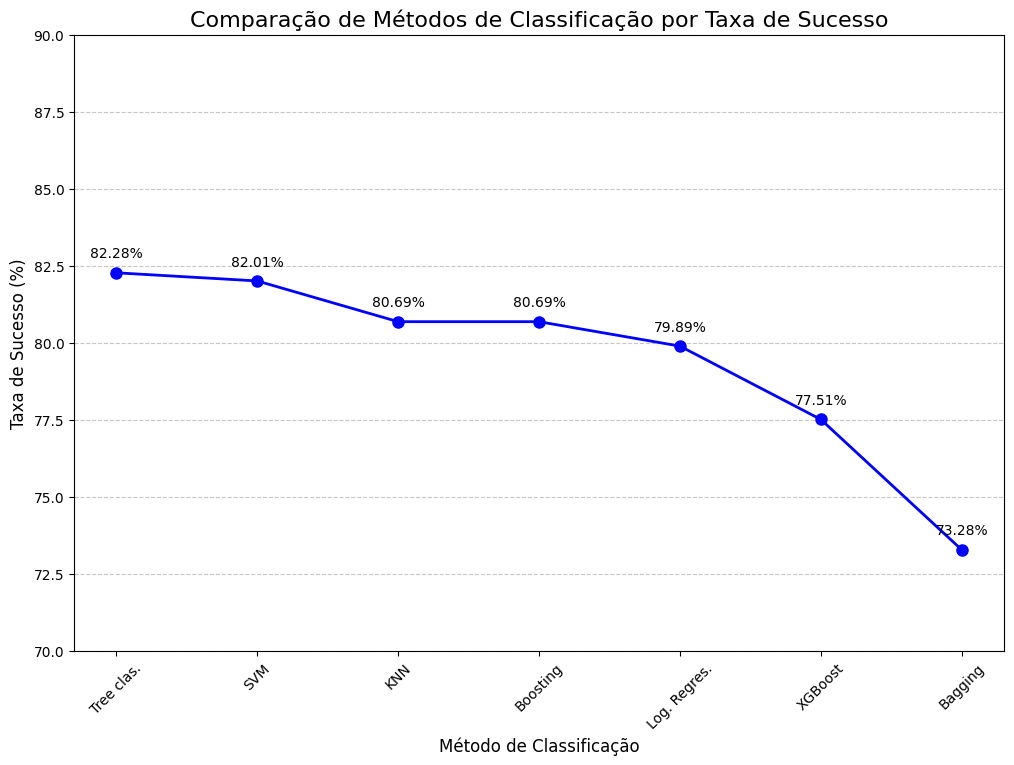

In [225]:
plotSuccess()

<a id='Creating_predictions_on_test_set'></a>
## **11. Criando previsões no conjunto de testes**

In [226]:
# Gerar previsões com o melhor método
clf = AdaBoostClassifier()  # Instancia o classificador AdaBoost
clf.fit(X, y)  # Treina o modelo com os dados de treino completos
dfTestPredictions = clf.predict(X_test)  # Faz previsões no conjunto de teste

# Escrever as previsões em um arquivo CSV
# Como não temos um campo significativo no conjunto de dados de teste, usamos o índice
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})  # Cria um DataFrame com as previsões

# Salvar os resultados em um arquivo CSV
# Este arquivo será visível na seção de saída após a publicação
results.to_csv('results.csv', index=False)  # Salva o DataFrame em um arquivo CSV
results.head()  # Exibe as primeiras linhas do arquivo de resultados


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Index,Treatment
0,5,1
1,494,0
2,52,0
3,984,0
4,186,0


<a id='Submision'></a>
## ** 12. Submision**

Preparar arquivo de envio
Fazemos envios em arquivos CSV. Seus envios geralmente têm duas colunas: uma coluna de ID e uma coluna de previsão. O campo ID vem dos dados de teste (mantendo o nome que o campo ID tinha nesses dados, que para nossos dados é o índice). A coluna de previsão usará o nome do campo de destino.

Criaremos um DataFrame com esses dados e, em seguida, usaremos o método to_csv do dataframe para escrever nosso arquivo de envio. Inclua explicitamente o argumento index=False para evitar que os pandas adicionem outra coluna em nosso arquivo csv.

In [ ]:
# Write predictions to csv file
# We don't have any significative field so we save the index
results = pd.DataFrame({'Index': X_test.index, 'Treatment': dfTestPredictions})
# Save to file
# This file will be visible after publishing in the output section
results.to_csv('submission.csv', index=False)


Clique no botão azul Publicar na parte superior da tela do seu notebook. Levará algum tempo para o seu kernel rodar. Quando terminar, sua barra de navegação no topo da tela terá uma guia para Saída. Isso só aparece se você escreveu um arquivo de saída (como fizemos na etapa Preparar arquivo de envio).

<a id='Conclusions'></a>
## **13. Conclusão**

Neste estudo, abordamos a análise de dados e a aplicação de diferentes algoritmos de machine learning para prever o tratamento de saúde mental com base em atributos relacionados ao ambiente de trabalho e histórico pessoal. O objetivo principal foi explorar as relações entre as variáveis do dataset e avaliar a performance de modelos de classificação na predição da variável alvo, "treatment".

#### Principais Achados:
1. **Análise de Dados:**
   - Identificamos fatores significativos como idade, gênero, histórico familiar e suporte no ambiente de trabalho que afetam a probabilidade de uma pessoa buscar tratamento de saúde mental.
   - As distribuições e correlações entre variáveis ofereceram insights importantes, como a relação direta entre histórico familiar e maior chance de tratamento.

2. **Modelagem e Avaliação:**
   - Diversos algoritmos de classificação foram implementados, incluindo regressão logística, random forests, SVM, AdaBoost e XGBoost.
   - O **AdaBoost** apresentou um desempenho consistente como o melhor modelo, com alta taxa de acurácia e métricas de avaliação equilibradas.
   - A validação cruzada e os gráficos de ROC ajudaram a identificar o desempenho real dos modelos em diferentes cenários.

3. **Importância das Variáveis:**
   - O uso de métodos como RandomizedSearchCV e análises de correlação destacou variáveis-chave, como suporte do supervisor e benefícios no trabalho, que influenciam diretamente os resultados.

#### Impacto e Limitações:
Este estudo demonstrou como técnicas de machine learning podem ser aplicadas para identificar padrões e prever comportamentos relacionados à saúde mental. Contudo, algumas limitações foram observadas:
- O desequilíbrio de classes no dataset pode impactar a sensibilidade dos modelos.
- Alguns atributos categóricos exigiram transformações que podem simplificar a complexidade real dos dados.

#### Próximos Passos:
1. Ampliar o escopo do estudo utilizando datasets mais abrangentes e diversificados.
2. Aplicar técnicas avançadas, como deep learning, para explorar interações mais complexas entre as variáveis.
3. Desenvolver um pipeline automatizado para integração e análise em larga escala.

Este notebook não apenas reforça a relevância da ciência de dados no campo da saúde mental, mas também abre espaço para discussões mais amplas sobre como empresas e organizações podem usar insights baseados em dados para criar ambientes de trabalho mais saudáveis e inclusivos.